In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from alg import sift, orb, utils

## Testing

In [3]:
import psutil

In [4]:
from tqdm.notebook import tqdm
from itertools import product
from functools import partial
image_dir     = 'data_check-20250922T083054Z-1-001/data_check'
image_paths   = list(map(utils.listdir, utils.listdir(image_dir)))

match_params = dict(
    n_features=list(range(250, 1250, 250)),
    thr=[0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9],
    k=[2],
)

keys, match_params = zip(*match_params.items())
match_params = product(*match_params)
match_params = [{k:v for k, v in zip(keys, _)} for _ in match_params]

for p in tqdm(match_params):
    utils.process_dataset(
        dataset_path=image_dir, 
        results_folder=f'results/final/orb-v1/{utils.timestamp()}',
        match_fn=partial(sift.match_fingerprints, **p),
        name='ORB+BF',
        save_imgs=False,
    )

  0%|          | 0/32 [00:00<?, ?it/s]

In [5]:
import os
path = '/mnt/c/Users/abrah/OneDrive - Universitetet i Agder/Abraham - UIA/Semester 7/Machine Vision/Assignments/fingerprint_matching/results/final/orb-v1'
path = utils.listdir(path)
results = list(map(
    lambda x: (utils.read_json(os.path.join(x[0], 'cm.json')), x[1], x[0]),
    zip(path, match_params)
))

In [33]:
import pandas as pd
cms, params, paths = zip(*results)
x = '/mnt/c/Users/abrah/OneDrive - Universitetet i Agder/Abraham - UIA/Semester 7/Machine Vision/Assignments/fingerprint_matching/results/final/sift-v1/251008230946/logs'
x = list(map(utils.read_json, utils.listdir(x)))
x = pd.DataFrame(x)
xp = x.preprocessing
xd = x.detection
xm = x.matching

In [6]:
cms, params, paths = zip(*results)

In [7]:
import numpy as np
cms = np.array(cms)
diag = (cms[:, 0, 0] + cms[:, 1, 1])
sums = cms.reshape(len(cms), -1).sum(-1)
scores = (diag/sums).tolist()
list(sorted(zip(scores, paths, params), key=lambda x: x[0]))[::-1]

[(0.8,
  '/mnt/c/Users/abrah/OneDrive - Universitetet i Agder/Abraham - UIA/Semester 7/Machine Vision/Assignments/fingerprint_matching/results/final/orb-v1/251008233339',
  {'n_features': 1000, 'thr': 0.7, 'k': 2}),
 (0.7,
  '/mnt/c/Users/abrah/OneDrive - Universitetet i Agder/Abraham - UIA/Semester 7/Machine Vision/Assignments/fingerprint_matching/results/final/orb-v1/251008233247',
  {'n_features': 250, 'thr': 0.8, 'k': 2}),
 (0.65,
  '/mnt/c/Users/abrah/OneDrive - Universitetet i Agder/Abraham - UIA/Semester 7/Machine Vision/Assignments/fingerprint_matching/results/final/orb-v1/251008233320',
  {'n_features': 750, 'thr': 0.7, 'k': 2}),
 (0.6,
  '/mnt/c/Users/abrah/OneDrive - Universitetet i Agder/Abraham - UIA/Semester 7/Machine Vision/Assignments/fingerprint_matching/results/final/orb-v1/251008233304',
  {'n_features': 500, 'thr': 0.8, 'k': 2}),
 (0.6,
  '/mnt/c/Users/abrah/OneDrive - Universitetet i Agder/Abraham - UIA/Semester 7/Machine Vision/Assignments/fingerprint_matching/res

In [13]:
building_images = utils.listdir('building_images')
building_images

['building_images/UiA front1.png', 'building_images/UiA front3.jpg']

In [14]:
match_params = dict(
    n_features=1000,
    checks=[1, 50, 100][0],
    thr=0.7,
    k=2,
)
(count, img), logs = sift.match_fingerprints(*building_images, **match_params, gray_scale=False)

In [15]:
logs

{'preprocessing': [{'cpu_user': 0.05000000000000071,
   'cpu_sys': 0.009999999999999953,
   'wall_time': 0.4336979389190674,
   'mem_before': 196.94140625,
   'mem_after': 200.859375,
   'mem_diff': 3.91796875,
   'peak_mem_MB': 6.484448432922363},
  {'cpu_user': 0.0,
   'cpu_sys': 0.010000000000000009,
   'wall_time': 0.17107868194580078,
   'mem_before': 200.859375,
   'mem_after': 204.609375,
   'mem_diff': 3.75,
   'peak_mem_MB': 3.6147308349609375}],
 'detection': [{'cpu_user': 0.35999999999999943,
   'cpu_sys': 0.38,
   'wall_time': 0.2419734001159668,
   'mem_before': 205.109375,
   'mem_after': 443.296875,
   'mem_diff': 238.1875,
   'peak_mem_MB': 0.5418167114257812},
  {'cpu_user': 0.1899999999999995,
   'cpu_sys': 0.050000000000000044,
   'wall_time': 0.06210184097290039,
   'mem_before': 443.296875,
   'mem_after': 470.546875,
   'mem_diff': 27.25,
   'peak_mem_MB': 0.5418167114257812}],
 'matching': {'cpu_user': 0.009999999999999787,
  'cpu_sys': 0.0,
  'wall_time': 0.0134

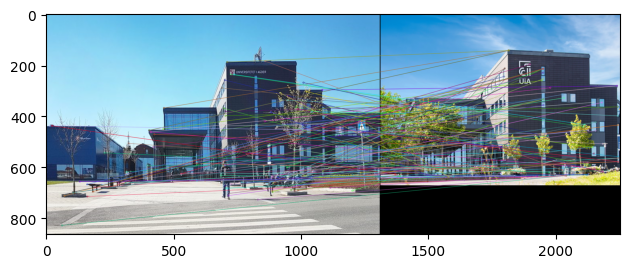

In [136]:
plt.imshow(img)
plt.tight_layout()
plt.savefig('out.png')